<a href="https://colab.research.google.com/github/ALjabriOmars/AIDL/blob/main/Copy_of_Tomato_leaf_disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Tomato leaf disease Classification
#Al Jabri Omar
#Department of Computer Science (Software Technology) Middel East College
#Muscat, Oman
#Jabriomars@hotmail.com


In [ ]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [ ]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/TEB&TH/Train'  # Update with your actual path
test_dir = '/content/drive/MyDrive/TEB&TH/Test'    # Update with your actual path

In [ ]:
import os
print(len(os.listdir('/content/drive/MyDrive/TEB&TH/Train/Tomato Early Blight')))
print(len(os.listdir('/content/drive/MyDrive/TEB&TH/Train/Tomato Healthy')))
print(len(os.listdir('/content/drive/MyDrive/TEB&TH/Test/Tomato Early Blight')))
print(len(os.listdir('/content/drive/MyDrive/TEB&TH/Test/Tomato Healthy')))

1920
1926
480
481


In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               1049088   
                                                                 
 dense_4 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24637313 (93.98 MB)
Trainable params: 1049601 (4.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 3077 images belonging to 2 classes.
Found 769 images belonging to 2 classes.


In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [ ]:
history = model.fit(train_data, epochs=30, validation_data=validation_data)

Epoch 1/30
97/97 [==============================] - 637s 6s/step - loss: 0.3175 - accuracy: 0.8473 - val_loss: 0.0634 - val_accuracy: 0.9766
Epoch 2/30
97/97 [==============================] - 525s 5s/step - loss: 0.0491 - accuracy: 0.9844 - val_loss: 0.0544 - val_accuracy: 0.9753
Epoch 3/30
97/97 [==============================] - 533s 5s/step - loss: 0.0197 - accuracy: 0.9942 - val_loss: 0.0165 - val_accuracy: 0.9961
Epoch 4/30
97/97 [==============================] - 558s 6s/step - loss: 0.0470 - accuracy: 0.9838 - val_loss: 0.0424 - val_accuracy: 0.9831
Epoch 5/30
97/97 [==============================] - 530s 5s/step - loss: 0.0413 - accuracy: 0.9873 - val_loss: 0.1338 - val_accuracy: 0.9532
Epoch 6/30
97/97 [==============================] - 520s 5s/step - loss: 0.0175 - accuracy: 0.9945 - val_loss: 0.0093 - val_accuracy: 0.9974
Epoch 7/30
97/97 [==============================] - 521s 5s/step - loss: 0.0093 - accuracy: 0.9974 - val_loss: 0.0552 - val_accuracy: 0.9844
Epoch 8/30
97

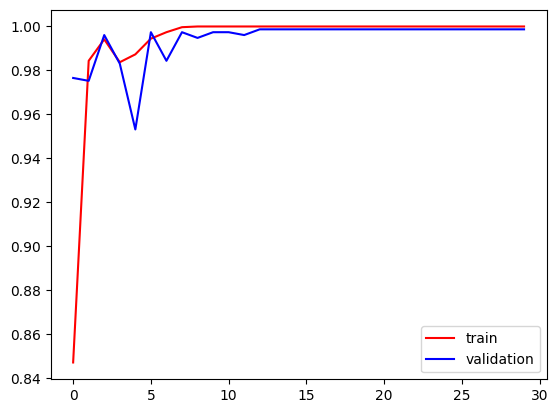

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

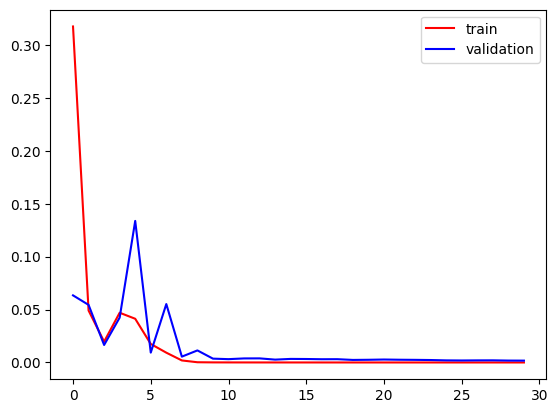

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 961 images belonging to 2 classes.


In [ ]:
#predict the test data
predictions = model.predict(test_data)
print(predictions)

31/31 [==============================] - 129s 4s/step
[[7.52730517e-12]
 [5.87485546e-11]
 [9.48339782e-14]
 [9.99999702e-01]
 [1.00000000e+00]
 [9.99991536e-01]
 [1.05454347e-08]
 [1.48687451e-09]
 [1.00000000e+00]
 [6.55534329e-13]
 [6.60235921e-10]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99999940e-01]
 [1.00000000e+00]
 [8.36814507e-10]
 [1.47552767e-14]
 [9.99999881e-01]
 [1.39888223e-09]
 [1.00000000e+00]
 [6.26898707e-12]
 [8.66286641e-16]
 [1.00000000e+00]
 [1.04300490e-09]
 [1.00000000e+00]
 [9.99968052e-01]
 [4.20796156e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.34219580e-09]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.44419505e-06]
 [1.44955004e-09]
 [1.00000000e+00]
 [9.74045199e-14]
 [4.57511529e-11]
 [2.40357474e-11]
 [1.00000000e+00]
 [6.84094445e-19]
 [1.00000000e+00]
 [1.23418524e-15]
 [8.44967385e-09]
 [6.41113952e-13]
 [1.60789910e-14]
 [7.22131513e-12]
 [1.00000000e+00]
 [2.49734594e-10]
 [1.00000000e+00]
 [6.88365973e-21]
 [1.00000000e+00]
 [1.56672464e-09]
 [5.538207

In [ ]:
len(predictions)

961

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[237 243]
 [246 235]]
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.49      0.49       480
           1       0.49      0.49      0.49       481

    accuracy                           0.49       961
   macro avg       0.49      0.49      0.49       961
weighted avg       0.49      0.49      0.49       961

